In [49]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from PIL import Image 
from io import BytesIO

In [50]:
nasa_key = 'ainiJeeBTLHlOF1loByc2Sg6dMTseSK3YBlndNTf'

In [51]:
url = 'https://api.nasa.gov/planetary/apod'

In [52]:
response = requests.get(url)
response.status_code

403

In [53]:
response.json()

{'error': {'code': 'API_KEY_MISSING',
  'message': 'No api_key was supplied. Get one at https://api.nasa.gov:443'}}

In [54]:
url2 = 'https://api.nasa.gov/planetary/apod?api_key=' + nasa_key

In [55]:
response2 = requests.get(url2)
response2.status_code

200

In [56]:
data = response2.json()
data

{'copyright': 'Dave Doctor',
 'date': '2025-01-09',
 'explanation': "The colorful, spiky stars are in the foreground of this image taken with a small telescope on planet Earth. They lie well within our own Milky Way Galaxy. But the two eye-catching galaxies in the frame lie far beyond the Milky Way, at a distance of over 300 million light-years. The galaxies' twisted and distorted appearance is due to mutual gravitational tides as the pair engage in close encounters. Cataloged as Arp 273 (also as UGC 1810), these galaxies do look peculiar, but interacting galaxies are now understood to be common in the universe. Closer to home, the large spiral Andromeda Galaxy is known to be some 2 million light-years away and inexorably approaching the Milky Way.  In fact the far away peculiar galaxies of Arp 273 may offer an analog of the far future encounter of Andromeda and Milky Way. Repeated galaxy encounters on a cosmic timescale ultimately result in a merger into a single galaxy of stars. From

In [57]:
image_url = data['hdurl']
image_url

'https://apod.nasa.gov/apod/image/2501/Image171a.jpg'

In [58]:
response3 = requests.get(image_url)
image = Image.open(BytesIO(response3.content))

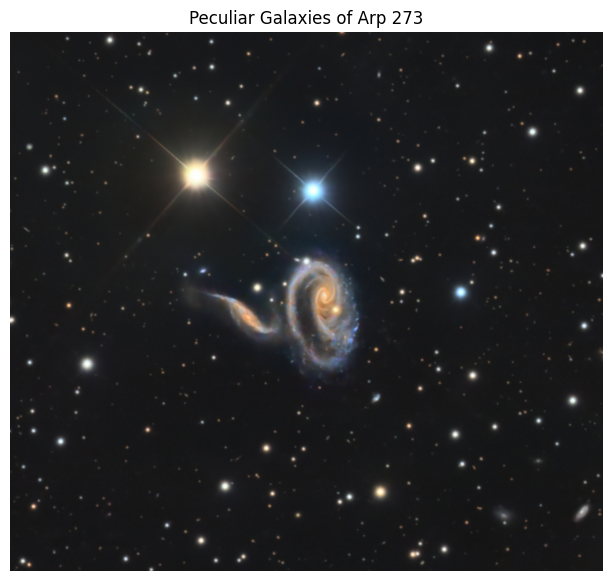

In [59]:
#Display the image 
plt.figure(figsize=(10, 7)) 
plt.imshow(image) 
plt.axis('off') 
plt.title(data['title']) 
plt.show()

In [60]:
#data = response2.json()
#data
df = pd.DataFrame([data])
df

,copyright,date,explanation,hdurl,media_type,service_version,title,url
0,Dave Doctor,2025-01-09,"The colorful, spiky stars are in the foregroun...",https://apod.nasa.gov/apod/image/2501/Image171...,image,v1,Peculiar Galaxies of Arp 273,https://apod.nasa.gov/apod/image/2501/Image171...


In [61]:
url_neo = 'https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key='+ nasa_key

In [83]:
response_neo = requests.get(url_neo)
response_neo.status_code
data_neo = response_neo.json()
data_neo

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-08&end_date=2015-09-09&detailed=false&api_key=ainiJeeBTLHlOF1loByc2Sg6dMTseSK3YBlndNTf',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-06&end_date=2015-09-07&detailed=false&api_key=ainiJeeBTLHlOF1loByc2Sg6dMTseSK3YBlndNTf',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&detailed=false&api_key=ainiJeeBTLHlOF1loByc2Sg6dMTseSK3YBlndNTf'},
 'element_count': 27,
 'near_earth_objects': {'2015-09-08': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2465633?api_key=ainiJeeBTLHlOF1loByc2Sg6dMTseSK3YBlndNTf'},
    'id': '2465633',
    'neo_reference_id': '2465633',
    'name': '465633 (2009 JR5)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2465633',
    'absolute_magnitude_h': 20.44,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2170475943,
      'estimated_diameter_max': 0.4853331752},
  

In [233]:
extracted_data = [
                   {'id': item['id'],
                    'name': item['name'],
                    'estimated_diameter' : item['estimated_diameter']['kilometers']['estimated_diameter_min'],
                    'kilometers_per_second' : item['close_approach_data'][0]['relative_velocity']['kilometers_per_second'],
                    'absolute_magnitude_h': item['absolute_magnitude_h']
                    } 
                for item in data_neo['near_earth_objects']['2015-09-07']]
extracted_data

[{'id': '2440012',
  'name': '440012 (2002 LE27)',
  'estimated_diameter': 0.3180936332,
  'kilometers_per_second': '1.1630843052',
  'absolute_magnitude_h': 19.61},
 {'id': '3713989',
  'name': '(2015 FC35)',
  'estimated_diameter': 0.0987540639,
  'kilometers_per_second': '8.7635328327',
  'absolute_magnitude_h': 22.15},
 {'id': '3726788',
  'name': '(2015 RG2)',
  'estimated_diameter': 0.0121494041,
  'kilometers_per_second': '8.0871658927',
  'absolute_magnitude_h': 26.7},
 {'id': '3727036',
  'name': '(2015 RL35)',
  'estimated_diameter': 0.0146067964,
  'kilometers_per_second': '3.5169616174',
  'absolute_magnitude_h': 26.3},
 {'id': '3727179',
  'name': '(2015 RH36)',
  'estimated_diameter': 0.0506471459,
  'kilometers_per_second': '7.2717612888',
  'absolute_magnitude_h': 23.6},
 {'id': '3727662',
  'name': '(2015 RX83)',
  'estimated_diameter': 0.0699125232,
  'kilometers_per_second': '2.694557063',
  'absolute_magnitude_h': 22.9},
 {'id': '3727663',
  'name': '(2015 RY83)',
 

In [234]:
# to data frame :

data_frame = pd.DataFrame(extracted_data)

In [235]:
data_frame

,id,name,estimated_diameter,kilometers_per_second,absolute_magnitude_h
0,2440012,440012 (2002 LE27),0.318094,1.1630843052,19.61
1,3713989,(2015 FC35),0.098754,8.7635328327,22.15
2,3726788,(2015 RG2),0.012149,8.0871658927,26.70
3,3727036,(2015 RL35),0.014607,3.5169616174,26.30
4,3727179,(2015 RH36),0.050647,7.2717612888,23.60
5,3727662,(2015 RX83),0.069913,2.694557063,22.90
6,3727663,(2015 RY83),0.038420,6.9802494143,24.20
7,3759353,(2016 RU33),0.008405,13.2144918467,27.50
8,3759690,(2016 RN41),0.001662,13.4815494029,31.02
9,3827337,(2018 RZ2),0.096506,18.513293253,22.20


In [236]:
data_frame.to_csv('nasa_neo_asteroid_features.csv', index=False)
